In [1]:
import numpy as np
# import tensorflow as tf
import tcellmatch.api as tm
from torchmetrics import Accuracy
# confusion mtx
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2023-06-13 08:56:05.260596: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ffn = tm.models.EstimatorFfn()
# data = np.load("ffn__resampled.npz")
data = np.load("ffn_data.npz")
ffn.x_train = data["x_train"]
ffn.covariates_train = data["covariates_train"]
ffn.y_train = data["y_train"]
ffn.x_test = data["x_test"]
ffn.covariates_test = data["covariates_test"]
ffn.y_test = data["y_test"]
ffn.clone_train = data["clone_train"]

In [3]:
ffn.x_train.shape

(51122, 1, 40, 26)

In [4]:
ffn.load_idx('SAVED_IDX')

In [5]:
ffn.build_bilstm(
    topology = [10, 10],
    residual_connection=True,
    aa_embedding_dim=0,
    optimizer='adam',
    lr=0.001,
    loss='cce',
    label_smoothing=0,
    use_covariates=False
)

In [6]:
ffn.model_hyperparam

{'model': 'bilstm',
 'topology': [10, 10],
 'split': False,
 'aa_embedding_dim': 0,
 'depth_final_dense': 1,
 'residual_connection': True,
 'dropout': 0.0,
 'optimizer': 'adam',
 'lr': 0.001,
 'loss': 'cce',
 'label_smoothing': 0,
 'optimize_for_gpu': True,
 'dtype': 'float32'}

In [16]:
print(ffn.model.input_shapes)

(1, 40, 26, 0, None)


In [6]:
# import numpy as np
# np.savez_compressed(
#     "ffn_resampled.npz",
#     x_train=ffn.x_train,
#     covariates_train=ffn.covariates_train,
#     y_train=ffn.y_train,
#     x_test=ffn.x_test,
#     covariates_test=ffn.covariates_test,
#     y_test=ffn.y_test,
#     clone_train=ffn.clone_train
# )

In [7]:
# !! WWLO -> train esta sando renotsmarto
ffn.train(
    epochs=1,
    batch_size=8,
    # log_dir='TRAINING_RUN_1pm'
    )

IndexError: index 36450 is out of bounds for axis 0 with size 36450

In [ ]:
import os
os.makedirs('saved_model', exist_ok=True)
ffn.save_model_full('saved_model', save_yhat=False, save_train_data=True)

In [ ]:
import torch

In [ ]:
# WWLO -> training and getting weights
# need to fix train function to work w/o covariates

all_clono = torch.load('all_unique_clono.pt')
all_clono= all_clono.to(torch.float32)
with torch.no_grad():
    ffn.model(all_clono, torch.tensor([[]]), save_embeddings=True)

In [ ]:
print(ffn.evaluate(test_only=True))
ffn.predict(save_embeddings=True)

{'test': {CrossEntropyLoss(): 3.2413878867950277, 'Binary Accuracy': 15.448191078328065}}


### See how balanced the ds is

In [ ]:
y_train = np.argmax(ffn.y_train, axis=1)
y_true = np.argmax(ffn.y_test, axis=1)

In [ ]:
# Count the occurrences of each value
unique_values, value_counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

1: 6
2: 229
4: 9
5: 3
7: 2
8: 1
9: 60
12: 6
13: 142
14: 3144
15: 377
18: 7
19: 9
20: 21
22: 30
23: 3
25: 13
26: 4
27: 3
28: 10
29: 3923
30: 124
31: 1
32: 311
33: 549
34: 3
35: 14
36: 3
37: 2
38: 1
40: 1
41: 2296
43: 47
50: 39839


### Evaluation

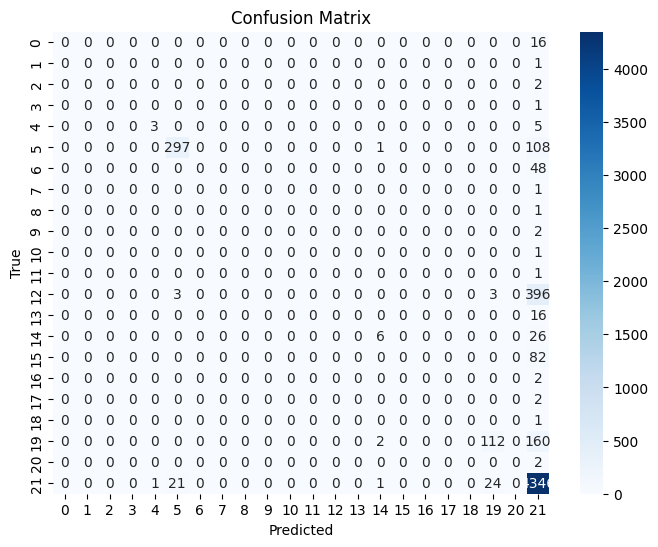

In [ ]:
# CONFUSION MATRIX
true_labels = np.argmax(ffn.y_test, axis=1)
predicted_labels = np.argmax(ffn.predictions, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = Accuracy(task="multiclass", num_classes=51)
y_hat = torch.from_numpy(y_hat)
y_true = torch.from_numpy(y_true)
accuracy(y_hat, y_true)

NameError: name 'y_hat' is not defined

In [ ]:
ffn2 = tm.models.EstimatorFfn()
ffn2.load_model_full(fn='saved_model')